In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import sys
sys.path.append('CAFE')
from CAFE import utils

In [43]:
import graph_analysis

In [44]:
from graph_analysis import CommunityAnalyzer

In [45]:
kg = utils.load_kg('beauty')

In [46]:
analyzer = CommunityAnalyzer(kg.G)

In [47]:
G = analyzer.build_graph(kg.G)

In [48]:
analyzer

In [49]:
from collections import Counter
partition = analyzer.identify_communities()

# Count the number of nodes in each community
community_sizes = Counter(partition.values())


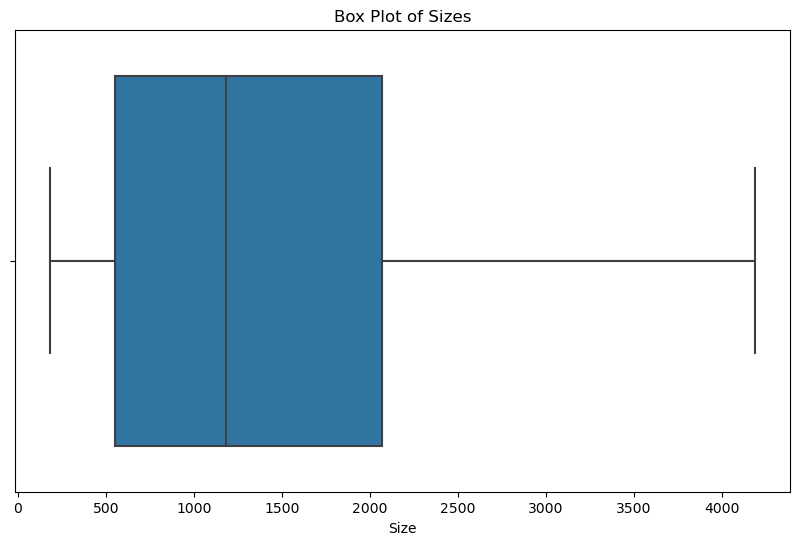

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
sizes = [2660, 173, 2926, 1486, 4010, 1478, 4313, 1688, 2009, 2329, 589, 924, 407, 920, 625, 1696, 320, 1580, 1822, 999, 273, 288, 182, 263, 290, 181, 296]
sizes = list(community_sizes.values())
# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=sizes)
plt.title('Box Plot of Sizes')
plt.xlabel('Size')
plt.show()


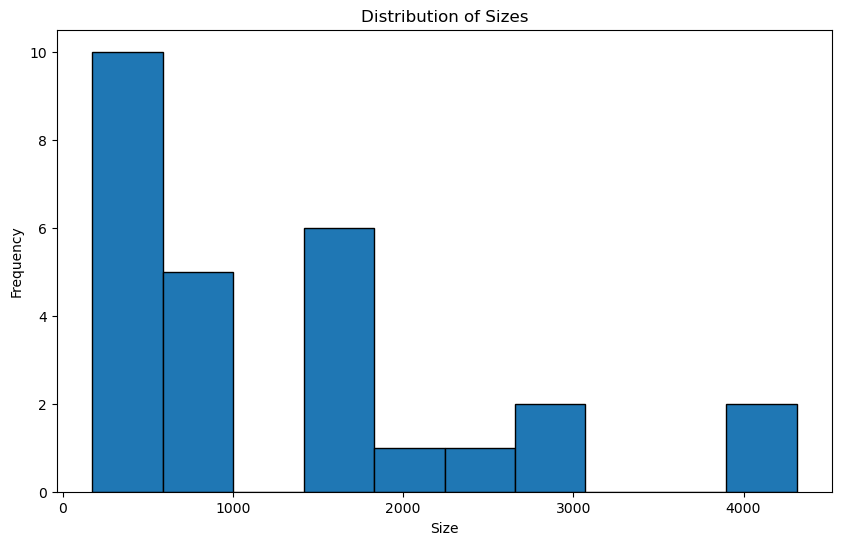

In [11]:
import matplotlib.pyplot as plt

# Data
sizes = [2660, 173, 2926, 1486, 4010, 1478, 4313, 1688, 2009, 2329, 589, 924, 407, 920, 625, 1696, 320, 1580, 1822, 999, 273, 288, 182, 263, 290, 181, 296]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(sizes, bins=10, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


In [12]:
composition_report = analyzer.report_community_composition()
composition_report

{'Community 0': {'product': 35,
  'category': 12,
  'brand': 22,
  'word': 921,
  'related_product': 1078},
 'Community 1': {'category': 11,
  'word': 324,
  'related_product': 903,
  'product': 20,
  'brand': 12},
 'Community 2': {'category': 6,
  'word': 669,
  'related_product': 1445,
  'product': 36,
  'brand': 15},
 'Community 3': {'word': 826,
  'related_product': 2045,
  'category': 14,
  'product': 59,
  'brand': 27},
 'Community 4': {'word': 1201,
  'related_product': 2842,
  'product': 85,
  'category': 25,
  'brand': 32},
 'Community 5': {'word': 388,
  'category': 9,
  'related_product': 660,
  'brand': 9,
  'product': 18},
 'Community 6': {'product': 27,
  'category': 7,
  'word': 459,
  'related_product': 1353,
  'brand': 14},
 'Community 7': {'category': 10,
  'word': 792,
  'related_product': 1744,
  'product': 40,
  'brand': 24},
 'Community 8': {'category': 1,
  'word': 115,
  'related_product': 169,
  'product': 5,
  'brand': 1},
 'Community 9': {'word': 1016,
  'pro

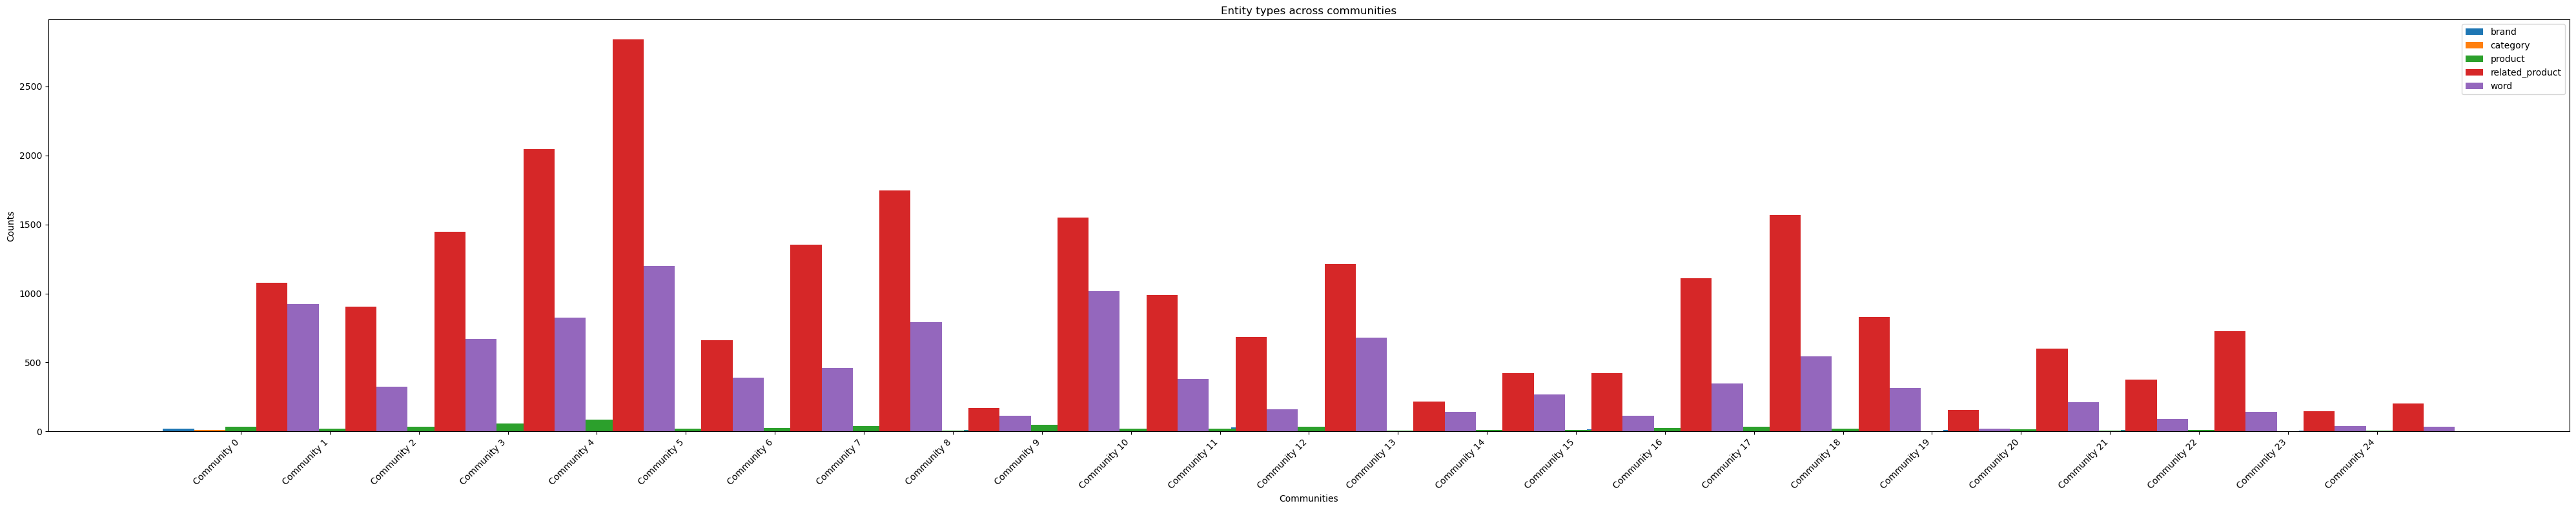

In [13]:
import matplotlib.pyplot as plt

def plot_community_composition(composition_report):
    # Extracting unique types and ensuring consistent order
    all_types = set(type for comp in composition_report.values() for type in comp)
    all_types = sorted(all_types)  # Sort to maintain order

    communities = list(composition_report.keys())
    bar_width = 0.35  # Bar width

    # Creating a figure and a set of subplots with a larger size
    fig, ax = plt.subplots(figsize=(40, 8))

    for index, entity_type in enumerate(all_types):
        # Extract counts for each community for this type
        counts = [composition_report[community].get(entity_type, 0) for community in communities]
        # Creating offset for each type to avoid overlap
        offsets = [x + index * bar_width for x in range(len(communities))]
        ax.bar(offsets, counts, bar_width, label=entity_type)

    ax.set_xlabel('Communities')
    ax.set_ylabel('Counts')
    ax.set_title('Entity types across communities')
    ax.set_xticks([r + (len(all_types) - 1) * bar_width / 2 for r in range(len(communities))])
    ax.set_xticklabels(communities, rotation=45, ha='right')  # Rotating labels

    ax.legend()

    plt.tight_layout()  # Adjust layout to make room for rotated labels
    plt.show()

# Assuming 'composition_report' is already generated from your analysis
plot_community_composition(composition_report)


In [14]:
def report_community_composition(partition):
    # This method assumes that 'identify_communities' has been called first
    if partition is None:
        raise ValueError("Communities not identified. Please run identify_communities() first.")

    # Initialize a dictionary to store the counts
    community_composition = collections.defaultdict(lambda: collections.Counter())
    
    # Iterate over each node and its community
    for node, community in self.partition.items():
        node_type = G.nodes[node]['type']  # Get the type of the node
        community_composition[community][node_type] += 1  # Increment the count of the type in its community

    # Create a readable report from the composition data
    report = {}
    for community, types in community_composition.items():
        report[f"Community {community}"] = dict(types)

    return report

In [15]:
import collections

In [16]:
report_community_composition(partition)

NameError: name 'self' is not defined

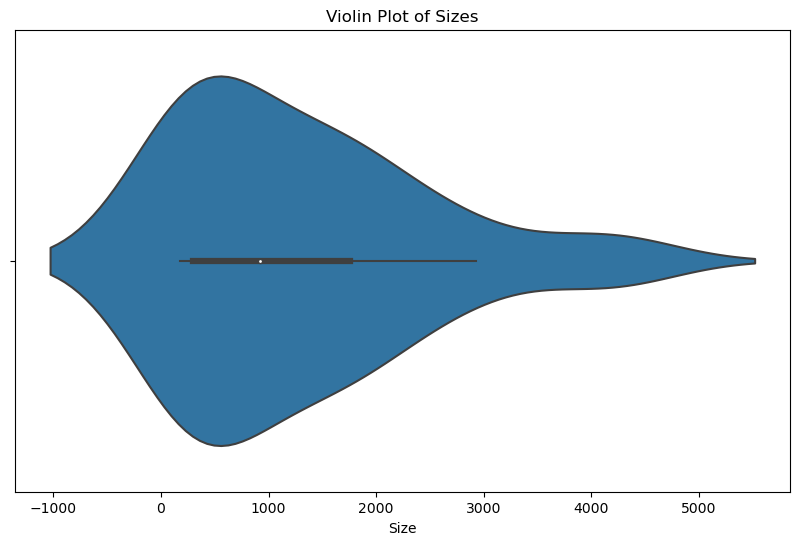

In [17]:
# Plotting the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=sizes)
plt.title('Violin Plot of Sizes')
plt.xlabel('Size')
plt.show()


In [18]:
def attribute_homogeneity(G, partition, attribute):
    attribute_distribution = {}
    for node, community in partition.items():
        node_type = G.nodes[node].get('type', 'unknown')
        if node_type == 'product':
            node_attribute = G.nodes[node].get(attribute, None)
            if community not in attribute_distribution:
                attribute_distribution[community] = []
            attribute_distribution[community].append(node_attribute)
    
    for community, attributes in attribute_distribution.items():
        print(f"Community {community} - {attribute}: {Counter(attributes)}")

# attribute_homogeneity(G, partition, 'brand')


In [19]:
# import matplotlib.pyplot as plt
# import networkx as nx

# def visualize_communities(G, partition):
#     pos = nx.spring_layout(G)
#     cmap = plt.get_cmap('viridis')
#     plt.figure(figsize=(12, 12))
#     nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50,
#                            cmap=cmap, node_color=list(partition.values()))
#     nx.draw_networkx_edges(G, pos, alpha=0.5)
#     plt.show()

# visualize_communities(G, partition)


In [20]:
attribute_homogeneity(G, partition, 'brand')

KeyError: ('product_0', 'product')

In [ ]:
from collections import Counter

def community_size_distribution(partition):
    size_distribution = Counter(partition.values())
    return size_distribution

size_distribution = community_size_distribution(partition)
print(f"Community Size Distribution: {size_distribution}")


In [ ]:
kg.

---

# modularity check

In [27]:
import networkx as nx
import numpy as np

In [28]:
def evaluate_communities(graph, partition):
    import networkx as nx
    modularity = nx.algorithms.community.modularity(graph, partition)
    sizes = [len(c) for c in partition]
    avg_size = sum(sizes) / len(sizes)
    size_variance = np.var(sizes)

    print(f"Modularity: {modularity}")
    print(f"Average Community Size: {avg_size}")
    print(f"Size Variance: {size_variance}")

    # Additional checks can be added here based on other metrics like homogeneity


In [29]:
# Step 1: Create a dictionary to hold sets of nodes for each community
community_dict = {}

# Step 2: Populate the dictionary with sets of nodes based on community IDs
for (node, _), community_id in partition.items():
    if community_id not in community_dict:
        community_dict[community_id] = set()
    community_dict[community_id].add(node)

# Step 3: Convert the dictionary to a list of sets
community_list = list(community_dict.values())

# Now community_list contains your partitions in the desired format
print("Communities as list of sets:", community_list)

Communities as list of sets: [{'word_5029', 'word_654', 'related_product_7206', 'word_1950', 'product_68', 'word_2656', 'related_product_9249', 'word_4950', 'related_product_4489', 'related_product_2145', 'related_product_12136', 'word_1740', 'word_8471', 'related_product_14684', 'related_product_21496', 'word_3435', 'word_3613', 'word_2600', 'word_375', 'word_2104', 'related_product_9408', 'related_product_21192', 'related_product_9442', 'word_1895', 'related_product_6846', 'related_product_10026', 'related_product_12134', 'word_9059', 'word_1738', 'word_2166', 'brand_85', 'related_product_5827', 'related_product_12176', 'related_product_13897', 'word_6298', 'related_product_9599', 'related_product_10363', 'related_product_4151', 'word_3058', 'word_6410', 'word_2298', 'word_5391', 'category_121', 'word_9902', 'related_product_15224', 'word_4262', 'word_7182', 'word_1772', 'word_735', 'related_product_22595', 'related_product_22124', 'word_8353', 'word_9392', 'word_1124', 'related_prod

In [31]:
len(G)

34727

In [36]:
import numpy as np

def analyze_community_sizes(partition):
    # Calculate the sizes of each community
    sizes = [len(community) for community in partition]
    
    # Compute mean and standard deviation of community sizes
    mean_size = np.mean(sizes)
    std_dev = np.std(sizes)
    
    print(f"Average community size: {mean_size}")
    print(f"Standard deviation of sizes: {std_dev}")
    
    # Define thresholds for large and small communities based on mean and standard deviation
    large_threshold = mean_size + 2 * std_dev
    small_threshold = mean_size - 2 * std_dev
    
    # Identify large and small communities
    large_communities = [community for community in partition if len(community) > large_threshold]
    small_communities = [community for community in partition if len(community) < small_threshold]
    
    # Output the sizes of large and small communities for verification
    print("Large communities (sizes):", [len(community) for community in large_communities])
    print("Small communities (sizes):", [len(community) for community in small_communities])

    return large_communities, small_communities

# Example Usage
# Assuming 'partition' is your list of sets, where each set contains nodes that belong to one community
# partition_example = [{1, 2, 3}, {4, 5, 6, 7, 8, 9, 10}, {11, 12}]  # This is a mock example
large_communities, small_communities = analyze_community_sizes(community_list)

Average community size: 1389.08
Standard deviation of sizes: 999.9084726113686
Large communities (sizes): [4185]
Small communities (sizes): []


[]

In [ ]:
small_communities

In [50]:
import networkx as nx
import numpy as np

def analyze_community_sizes(graph, partition):
    sizes = [len(list(filter(lambda x: x == community, partition.values()))) for community in set(partition.values())]
    mean_size = np.mean(sizes)
    std_dev = np.std(sizes)
    print(f"Average community size: {mean_size}")
    print(f"Standard deviation of sizes: {std_dev}")
    
    # Identify outlier communities
    large_threshold = mean_size + 2 * std_dev
    small_threshold = mean_size - 2 * std_dev
    large_communities = [size for size in sizes if size > large_threshold]
    small_communities = [size for size in sizes if size < small_threshold]
    
    return large_communities, small_communities

# Example usage
# G = nx.karate_club_graph()  # Example graph
# partition = nx.algorithms.community.louvain_communities(G, seed=42)
# large_communities, small_communities = analyze_community_sizes(G, partition)


In [53]:
import networkx as nx
from community import community_louvain
import numpy as np

def analyze_community_sizes(graph, partition):
    sizes = [len(community) for community in partition]
    mean_size = np.mean(sizes)
    std_dev = np.std(sizes)
    large_threshold = mean_size + 2 * std_dev
    
    # Identify large communities
    large_communities = [community for community in partition if len(community) > large_threshold]
    
    return large_communities

def subdivide_large_communities(graph, large_communities):
    subdivided_communities = []
    community_id = 0  # to ensure unique community ids across all subdivisions
    for community in large_communities:
        subgraph = graph.subgraph(community)
        sub_partition = community_louvain.best_partition(subgraph, resolution=1.0)
        # Adjust community identifiers to be unique across the whole graph
        adjusted_partition = {node: sub_com + community_id for node, sub_com in sub_partition.items()}
        community_id += len(set(sub_partition.values()))  # increment to avoid overlapping community ids
        subdivided_communities.append(adjusted_partition)
    return subdivided_communities

def flatten_partitions(partitions):
    # Flattens a list of dictionaries into a single dictionary
    flattened = {}
    for partition in partitions:
        flattened.update(partition)
    return flattened

def calculate_modularity(graph, partition):
    return community_louvain.modularity(partition, graph)

# Example usage
# G = nx.karate_club_graph()  # Example graph
partition = community_louvain.best_partition(G)
initial_modularity = calculate_modularity(G, partition)

# Simulate large communities detection and subdivision
large_communities = [set(G.nodes())]  # Assume all nodes form one large community for the example
subdivisions = subdivide_large_communities(G, large_communities)

# Flatten subdivisions for modularity calculation
flattened_subdivisions = flatten_partitions(subdivisions)
new_modularity = calculate_modularity(G, flattened_subdivisions)

print(f"Initial Modularity: {initial_modularity}")
print(f"New Modularity after subdivision: {new_modularity}")


Initial Modularity: 0.47084659831172143
New Modularity after subdivision: 0.4714984656089286


In [66]:
def analyze_community_sizes(partition):
    sizes = {i: len(community) for i, community in enumerate(partition)}
    mean_size = np.mean(list(sizes.values()))
    std_dev = np.std(list(sizes.values()))
    large_threshold = mean_size + 2 * std_dev
    small_threshold = mean_size - 2 * std_dev
    
    large_communities = [i for i, size in sizes.items() if size > large_threshold]
    small_communities = [i for i, size in sizes.items() if size < small_threshold]
    
    return large_communities, small_communities, sizes

In [ ]:
import networkx as nx
from community import community_louvain
import numpy as np

def analyze_community_sizes(graph, partition):
    sizes = {i: len(community) for i, community in enumerate(partition)}
    mean_size = np.mean(list(sizes.values()))
    std_dev = np.std(list(sizes.values()))
    large_threshold = mean_size + 2 * std_dev
    small_threshold = mean_size - 2 * std_dev
    
    large_communities = [i for i, size in sizes.items() if size > large_threshold]
    small_communities = [i for i, size in sizes.items() if size < small_threshold]
    
    return large_communities, small_communities, sizes

def merge_small_communities(graph, partition, small_communities, sizes, target_size):
    # Attempt to merge small communities based on proximity and combined size
    community_graph = nx.Graph()
    community_graph.add_nodes_from(small_communities)
    
    # Add edges between communities that are geographically close or share nodes
    for i in small_communities:
        for j in small_communities:
            if i != j:
                # Check if communities are close, e.g., share edges or nodes
                shared_nodes = set(partition[i]).intersection(partition[j])
                if shared_nodes:
                    community_graph.add_edge(i, j)
    
    # Use connected components to merge communities
    merged_communities = []
    for component in nx.connected_components(community_graph):
        merged = set()
        for node in component:
            merged.update(partition[node])
        if len(merged) < target_size:
            for node in component:
                # Find the closest community to merge with based on node sharing or edge connections
                neighbors = list(community_graph.neighbors(node))
                if neighbors:
                    closest = max(neighbors, key=lambda x: len(set(partition[node]).intersection(partition[x])))
                    merged.update(partition[closest])
        merged_communities.append(merged)
    
    return merged_communities

def flatten_partitions(partitions):
    flattened = {}
    community_id = 0
    for partition in partitions:
        for node in partition:
            flattened[node] = community_id
        community_id += 1
    return flattened

def calculate_modularity(graph, partition):
    return community_louvain.modularity(partition, graph)

# Example usage
# G = nx.karate_club_graph()
partition = list(community_louvain.best_partition(G).values())
initial_modularity = calculate_modularity(G, partition)

large_communities, small_communities, sizes = analyze_community_sizes(G, partition)
merged_communities = merge_small_communities(G, partition, small_communities, sizes, target_size=10)

# Flatten partitions including merged communities
final_partition = flatten_partitions(merged_communities)
new_modularity = calculate_modularity(G, final_partition)

print(f"Initial Modularity: {initial_modularity}")
print(f"New Modularity after merging small communities: {new_modularity}")


In [54]:
subdivisions

[{'product_0': 0,
  'category_0': 1,
  'category_4': 2,
  'category_17': 3,
  'category_18': 0,
  'category_19': 3,
  'brand_1': 0,
  'word_849': 0,
  'word_1065': 0,
  'word_1418': 0,
  'word_1627': 0,
  'word_1715': 0,
  'word_2079': 4,
  'word_2161': 0,
  'word_2637': 0,
  'word_2930': 0,
  'word_2940': 5,
  'word_3316': 0,
  'word_3614': 0,
  'word_4268': 5,
  'word_4421': 4,
  'word_4837': 0,
  'word_4852': 5,
  'word_4866': 6,
  'word_5320': 0,
  'word_5653': 0,
  'word_8247': 0,
  'word_8524': 0,
  'word_9059': 7,
  'word_10123': 3,
  'word_10224': 0,
  'word_10336': 8,
  'word_10337': 0,
  'related_product_401': 0,
  'related_product_3452': 0,
  'related_product_3531': 0,
  'related_product_3533': 0,
  'related_product_3535': 0,
  'related_product_3538': 0,
  'related_product_4014': 0,
  'related_product_4015': 0,
  'related_product_4016': 0,
  'related_product_4017': 0,
  'related_product_4019': 0,
  'related_product_4102': 0,
  'related_product_4103': 0,
  'related_product_41

In [51]:
analyze_community_sizes(G, partition)

Average community size: 1335.6538461538462
Standard deviation of sizes: 1053.6955093058718


([3974, 3646], [])

In [30]:
evaluate_communities(G, community_list)

Modularity: 0.4720560895429936
Average Community Size: 1389.08
Size Variance: 999816.9536


In [68]:
degree_centrality = nx.degree_centrality(G)

In [70]:
degree_centrality['category_0']

0.017047745205321662